This notebook demonstrates how to use the Pauli Twirling module
from qemlib to randomize coherent noise.

We apply PT to a simple circuit.

In [1]:
from qiskit import QuantumCircuit
from qemlib.pt import run_pt
from qemlib.pt import random_pauli, PAULIS_CNOT, PAULIS_ECR
from qiskit.quantum_info import SparsePauliOp
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error

# Simple depolarizing noise
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(
    depolarizing_error(0.02, 1), ["rx", "rz", "sx"]
)

backend = AerSimulator(noise_model=noise_model)
observable = SparsePauliOp.from_list([("ZZ", 1.0)])


Pauli twirling generates multiple randomized circuits
that are logically equivalent to the original one.

Their expectation values are averaged to reduce
coherent noise effects.


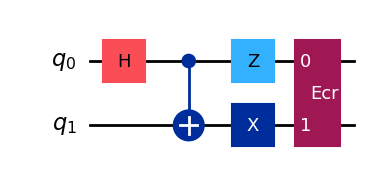

In [2]:
from qiskit_ibm_runtime import EstimatorV2 as Estimator

def executor(circuit):
    estimator = Estimator(mode=backend, options={"default_shots": 2000})
    job = estimator.run([(circuit, observable)])
    result = job.result()[0]
    return result.data.evs

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.x(1)
qc.z(0)
qc.ecr(0,1)
qc.draw("mpl")


In [3]:
avg, values = run_pt(qc, executor, shots=20)

print("PT average:", avg)

PT average: 0.006750000000000001
